antes de crear cualquier codigo importo lo necesario

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json


creo la ruta del csv con el cual voy a trabajar

In [3]:
ruta_proyecto = os.path.abspath(os.path.dirname(__name__))
ruta_proyecto
archivo = os.path.join(ruta_proyecto, "ventanas" ,"csv", "imagenes.csv")  # rutacsv
archivo

'c:\\Users\\facup\\OneDrive\\Escritorio\\prueba\\ventanas\\csv\\imagenes.csv'

ahora leo el csv el cual voy a utilizar

In [4]:
df = pd.read_csv(archivo)
df

,ruta_relativa,texto descriptivo,resolucion,tamanio,tipo,lista de tags,ultimo perfil que actualizo,ultima actualizacion
0,cara.png,,"(225, 225)",5,PNG,"dibujito,carita,sonrisa",facundo,1687029817
1,charmander.png,,"(211, 239)",8,PNG,"dibujito,pokemon,fuego,carita,primera evolucion",martin,1687031757
2,messi.png,,"(276, 182)",8,PNG,"dibujito,messi,futbol,pelota",martin,1687133778
3,patricio.png,,"(203, 248)",7,PNG,"dibujito,patircio,mar,bob esponja",federico,1687030045


creo el grafico de tortas que me muestra el porcentaje de cada tipo segun la imagen

si agrego esto al csv, cambia, pero no puedo hacer que la app lea imagenes con .jpg
pinguino.jpg,pinguino,"(203, 268)",7,JPG,"['dibujitos']", ,1686609789
carita.jpg,carita,"(201, 90)",7,JPG,"['dibujitos']", ,1686609789
pikachu.jpeg,carita,"(100, 300)",7,JPEG,"['dibujitos']", ,1686609789

{'PNG'}


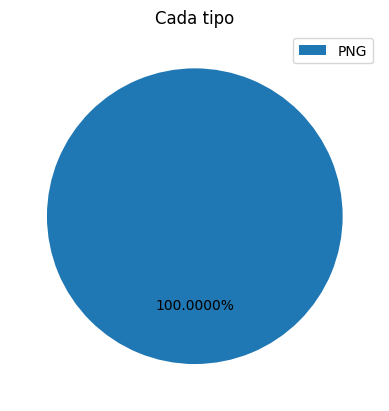

In [67]:
tipos = df['tipo'].value_counts().sort_values(ascending=False)
etiquetas = set(df['tipo'].values)
print(etiquetas)
data = list(tipos.values)
plt.pie(data, autopct='%1.4f%%', startangle=90)
plt.legend(etiquetas)

plt.title('Cada tipo')
plt.show()

saco los maximos de altura y anchura de las fotos

In [70]:
# Función de conversiion de una tupla en cadena a tupla objeto
def convertir_a_tupla(cadena):
    cadena_limpia = cadena.strip('()')  # Eliminar paréntesis de inicio y fin
    elementos = cadena_limpia.split(', ')  # Dividir la cadena en elementos separados por coma y espacio
    tupla = tuple(map(int, elementos))  # Convertir cada elemento a entero y crear la tupla
    return tupla

lista_cadenas = list(df['resolucion'])
# Convertir la lista de cadenas a lista de tuplas
lista_tuplas = [convertir_a_tupla(cadena) for cadena in lista_cadenas]

lista_tuplas


[(225, 225), (211, 239), (276, 182), (203, 248)]

In [69]:
def mas_grande(lista):
    '''' 
    lo que hace esta funcion es recibir una lista de tuplas con el ancho y alto, y devolver el alto mas grande
    '''
    max_alto = max(lista, key=lambda x:x[0])#saco el mayor por el primer elem de la tupla
    max_ancho = max(lista, key=lambda x:x[1])#saco el mayor por el segundo elem de la tupla
    devolver = 'El mas grande de alto es: ',max_alto[0],'. El mas grande de ancho es: ',max_ancho[1]
    
    return devolver
mas_grande(lista_tuplas)

('El mas grande de alto es: ', 276, '. El mas grande de ancho es: ', 248)

grafico de dispersion de las alturas y ancho de las fotos

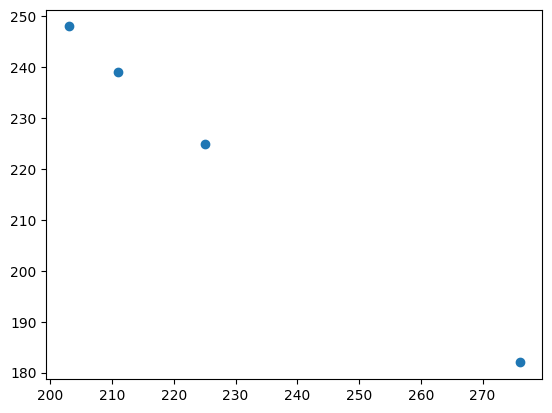

In [72]:
#pongo en listas los elementos a graficar
lista_altos = list(map( lambda x:x[0], lista_tuplas))#los elementos de altura
lista_anchos = list(map( lambda x:x[1], lista_tuplas))#los elementos del ancho
#grafico
fig, ax = plt.subplots()
ax.scatter(lista_altos, lista_anchos)
plt.show()

agrego una columna con la fecha de modificacion en otro formato

In [73]:
# Convertir la columna 'ultima actualizacion' de str a int
df['ultima actualizacion'] = df['ultima actualizacion'].astype(int)


In [74]:
df['fecha'] = df['ultima actualizacion'].apply(lambda x: datetime.fromtimestamp(x))  #cambio el formato de la actualizacion
df

,ruta_relativa,texto descriptivo,resolucion,tamanio,tipo,lista de tags,ultimo perfil que actualizo,ultima actualizacion,fecha
0,cara.png,,"(225, 225)",5,PNG,"dibujito,carita,sonrisa",facundo,1687029817,2023-06-17 16:23:37
1,charmander.png,,"(211, 239)",8,PNG,"dibujito,pokemon,fuego,carita,primera evolucion",martin,1687031757,2023-06-17 16:55:57
2,messi.png,,"(276, 182)",8,PNG,"dibujito,messi,futbol",facundo,1687029876,2023-06-17 16:24:36
3,patricio.png,,"(203, 248)",7,PNG,"dibujito,patircio,mar,bob esponja",federico,1687030045,2023-06-17 16:27:25


con esa nueva columna agregada, agrupo segun cuantas modificaciones se hicieron por dia en las fotos

In [75]:
df['dias_semana'] = df['fecha'].dt.day_name() #agrupo por dia
df

,ruta_relativa,texto descriptivo,resolucion,tamanio,tipo,lista de tags,ultimo perfil que actualizo,ultima actualizacion,fecha,dias_semana
0,cara.png,,"(225, 225)",5,PNG,"dibujito,carita,sonrisa",facundo,1687029817,2023-06-17 16:23:37,Saturday
1,charmander.png,,"(211, 239)",8,PNG,"dibujito,pokemon,fuego,carita,primera evolucion",martin,1687031757,2023-06-17 16:55:57,Saturday
2,messi.png,,"(276, 182)",8,PNG,"dibujito,messi,futbol",facundo,1687029876,2023-06-17 16:24:36,Saturday
3,patricio.png,,"(203, 248)",7,PNG,"dibujito,patircio,mar,bob esponja",federico,1687030045,2023-06-17 16:27:25,Saturday


creo un diccionario con la cantidad de act por dia

In [76]:
lista_dias = df['dias_semana']

diccionario = {}
for elemento in lista_dias:
    if elemento in diccionario:
        diccionario[elemento] += 1
    else:
        diccionario[elemento] = 1

print(diccionario)
dias = list(diccionario.keys())
valores = list(diccionario.values())

{'Saturday': 4}


creo el grafico de cantidad de cambios realizados para cada día de la semana

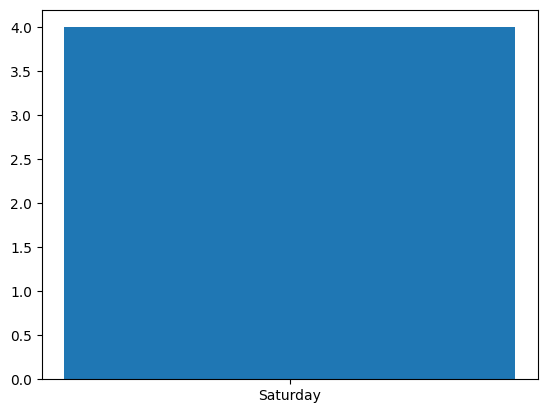

In [77]:
fig, ax = plt.subplots()
ax.bar(dias, valores)
plt.show()

grafico de líneas para visualizar la evolución de la cantidad de actualizaciones a lo largo del tiempo

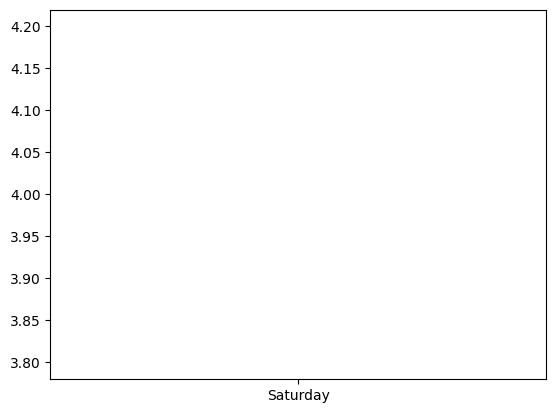

In [78]:
fig, ax = plt.subplots()
ax.plot(dias,valores)
plt.show()

In [79]:
df2 = df.copy()
df2['lista de tags'] = df2['lista de tags'].str.split(',')
df2['lista de tags'].explode() #pongo los tags separados en una lista pero me lee tambien los corchetes y espacios

0             dibujito
0               carita
0              sonrisa
1             dibujito
1              pokemon
1                fuego
1               carita
1    primera evolucion
2             dibujito
2                messi
2               futbol
3             dibujito
3             patircio
3                  mar
3          bob esponja
Name: lista de tags, dtype: object

lo que hago en la celda siguiente es acomodar todas las palabras con las cuales voy a crear una nube de palabras

In [80]:
lista_palabras = [palabra for lista in df2['lista de tags'] for palabra in lista]

caracteres_a_eliminar = ['[', ']', '',"'", '"',' ']

tabla_de_traduccion = str.maketrans('', '', ''.join(caracteres_a_eliminar))

lista_sin_caracteres = [elemento.translate(tabla_de_traduccion) for elemento in lista_palabras]

print(lista_sin_caracteres)#hice esto por que sino las que son iguales pero con espacios no me los tomaba como iguales

['dibujito', 'carita', 'sonrisa', 'dibujito', 'pokemon', 'fuego', 'carita', 'primeraevolucion', 'dibujito', 'messi', 'futbol', 'dibujito', 'patircio', 'mar', 'bobesponja']


creo la nube de palabras

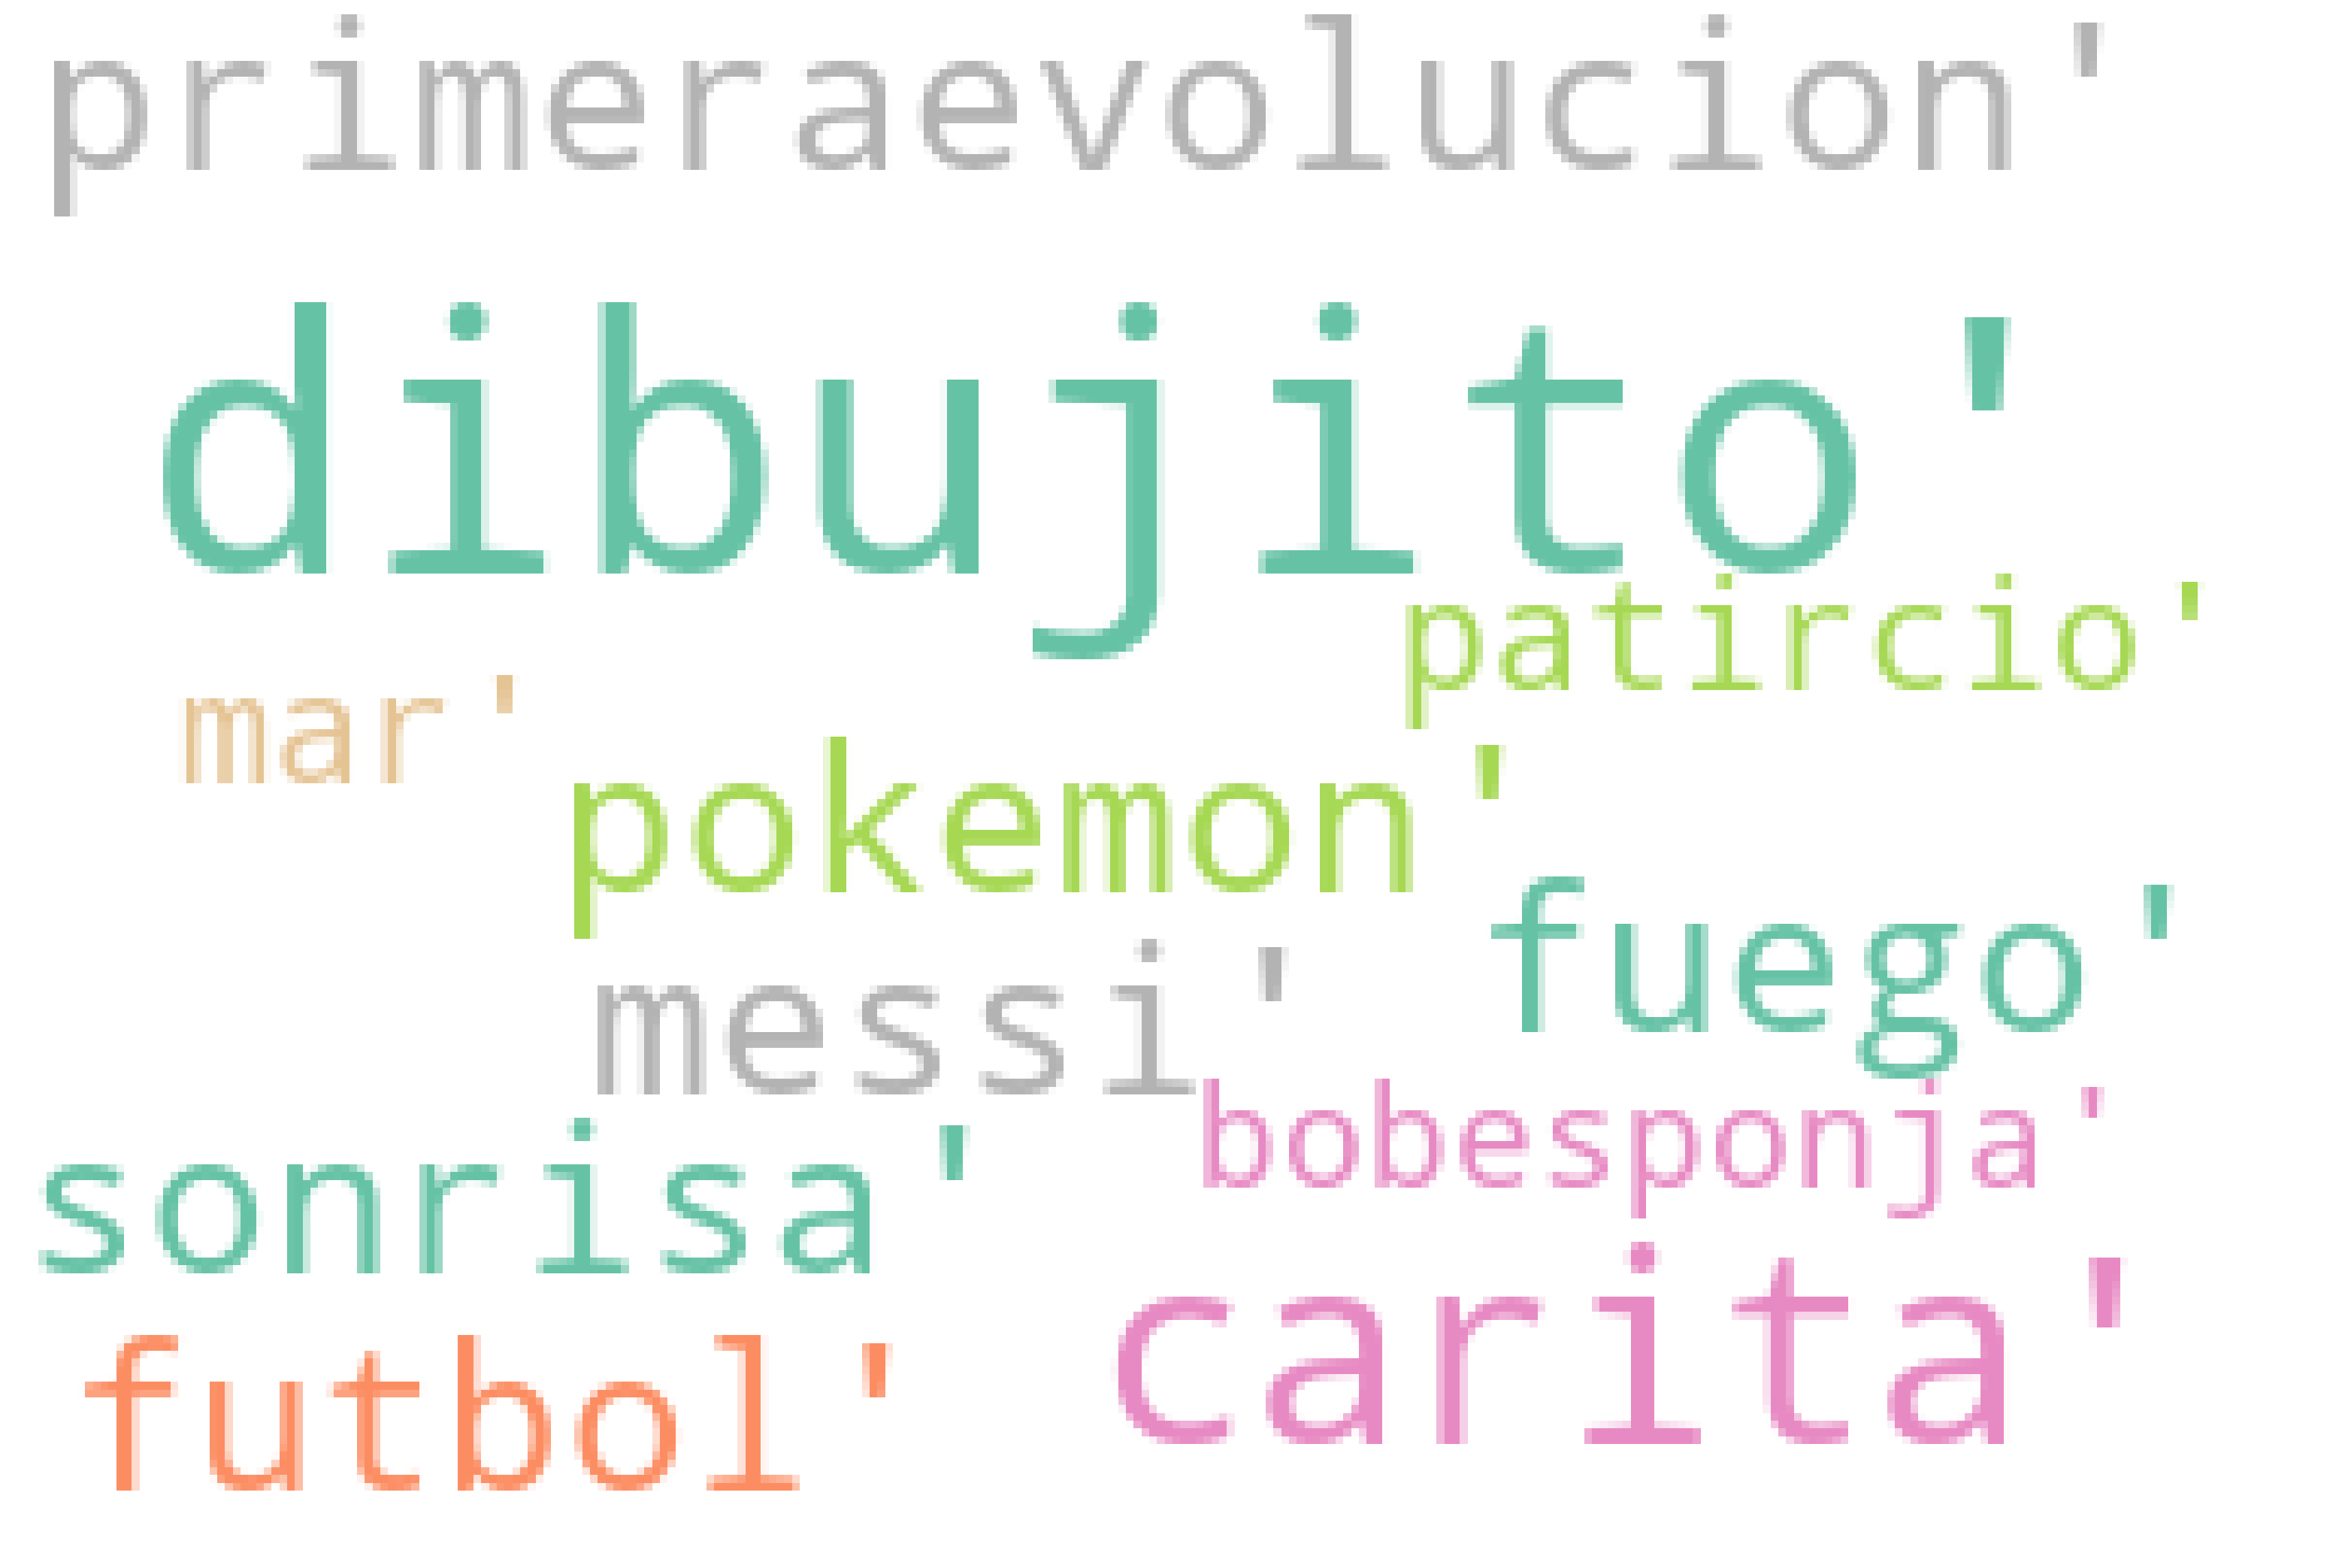

In [81]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
text = str(lista_sin_caracteres)
# Generate wordcloud
wordcloud = WordCloud(width = 300, height = 200, random_state=1,background_color='white', colormap='Set2', collocations=False, stopwords =STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)


ver los 3 tags mas utilizados

aca creo un diccionario con la cantidad de veces que aparece cada palabra, la palabra como llave y su cantidad como valor, para luego poder crear un dataframe con esos valores y ver los primeros 3 tags mas utilizados 

In [82]:
dic = {}
for elemento in lista_sin_caracteres:
    if elemento in dic:
        dic[elemento] += 1
    else:
        dic[elemento] = 1

dias = list(dic.keys())
valores = list(dic.values())

diccionario_ordenado = dict(sorted(dic.items(), key=lambda x: x[1], reverse=True))
df_cant = pd.DataFrame({'tag': [f"{elem}" for elem in diccionario_ordenado.keys()],
                    'cantidad': [f"{elem}" for elem in diccionario_ordenado.values()]})

df_cant.head(3)

,tag,cantidad
0,dibujito,4
1,carita,2
2,sonrisa,1


Calcular el tamaño en bytes promedio de las imágenes actualizadas por cada perfil, incluir los perfiles que no hayan realizado actualizaciones.

In [83]:
#lista de todos los perfiles de la app
archivo_json = os.path.join(ruta_proyecto, "ventanas" ,"json", "perfiles.json")  # rutajson
"""Se bajan los datos del json para poder trabajar"""
with open(archivo_json) as file:
    data = json.load(file)

#usuarios = data['usuarios']

nombres_usuarios = []

for usuario in data:
    nombre = usuario['nombre']
    nombres_usuarios.append(nombre)


df_todos_nombres = pd.DataFrame({'nombre':nombres_usuarios})
df_todos_nombres
#creo un dataframe con todos los nombres de todos los usuarios

,nombre
0,facundo
1,federico
2,martin
3,martina
4,gigi
5,lorena
6,franco armani
7,mauricio


In [84]:
#saco el nombre y el tamaño de la foto del que modificó
lista_apariciones = list(zip(df['ultimo perfil que actualizo'], df['tamanio']))#lista de cada usuario que modifico y el tamanio de la foto que modifico
print(lista_apariciones)
frame_apariciones = pd.DataFrame(lista_apariciones, columns=['nombre','tamanio'])#frame del usuario con el tamamnio de la foto que modifico
frame_apariciones

[('facundo', 5), ('martin', 8), ('facundo', 8), ('federico', 7)]


,nombre,tamanio
0,facundo,5
1,martin,8
2,facundo,8
3,federico,7


In [85]:
#saco los promedios de los que aparecen
prom = list(frame_apariciones.groupby('nombre')['tamanio'].sum()/frame_apariciones['nombre'].value_counts())#promedio
data_promedios = pd.DataFrame({'nombre':frame_apariciones['nombre'].unique(),'promedio':prom})
print(prom)
print(data_promedios)

[6.5, 7.0, 8.0]
     nombre  promedio
0   facundo       6.5
1    martin       7.0
2  federico       8.0


In [86]:
join = pd.merge(df_todos_nombres,data_promedios, on='nombre', how='outer')
join

,nombre,promedio
0,facundo,6.5
1,federico,8.0
2,martin,7.0
3,martina,NaN
4,gigi,NaN
5,lorena,NaN
6,franco armani,NaN
7,mauricio,NaN
